- 10092호 1206* 환경테스트
- 9/26~9/27 데이터. 9/26은 SMOKE 미작동. 9/27은 알 수 없는 이유로 꺼짐

In [2]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [13]:
import matplotlib
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
print(font_name)
matplotlib.rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

Malgun Gothic


In [9]:
data = pd.DataFrame()
for d in ['20240926', '20240927']:
    dd = pd.read_csv(f'./data/ex_01/{d}.csv', parse_dates=['시간'])
    dd = dd[['시간', 'Temp_6', 'Humidty_6', 'TVOC_6', 'CO2_6', 'Nori_TVOC', 'Nori_CO2', 'Smoke']]
    dd['t_truncated'] = dd['시간'].apply(lambda x: datetime(x.year, x.month, x.day, x.hour))
    print(dd.info())
    data = pd.concat([data, dd], ignore_index=True)
    
print(data.head())
print(data.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2989 entries, 0 to 2988
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   시간           2989 non-null   datetime64[ns]
 1   Temp_6       2989 non-null   float64       
 2   Humidty_6    2989 non-null   float64       
 3   TVOC_6       2989 non-null   int64         
 4   CO2_6        2989 non-null   int64         
 5   Nori_TVOC    2989 non-null   int64         
 6   Nori_CO2     2989 non-null   int64         
 7   Smoke        2989 non-null   int64         
 8   t_truncated  2989 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(5)
memory usage: 210.3 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3055 entries, 0 to 3054
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   시간           3055 non-null   datetime64[ns]
 1   Temp_6       3055 non

In [29]:
d27 = data[ data['시간'] >= '2024-09-27' ]
print(d27.head())

                      시간  Temp_6  Humidty_6  TVOC_6  CO2_6  Nori_TVOC  \
2989 2024-09-27 00:00:03   32.76      38.97     151    628        110   
2990 2024-09-27 00:00:13   32.76      38.97     151    628        110   
2991 2024-09-27 00:00:23   32.76      38.97     151    628        110   
2992 2024-09-27 00:00:33   32.76      38.97     151    628        110   
2993 2024-09-27 00:00:43   32.76      38.97     151    628        110   

      Nori_CO2  Smoke t_truncated  
2989       452      0  2024-09-27  
2990       452      0  2024-09-27  
2991       452      0  2024-09-27  
2992       452      0  2024-09-27  
2993       452      0  2024-09-27  


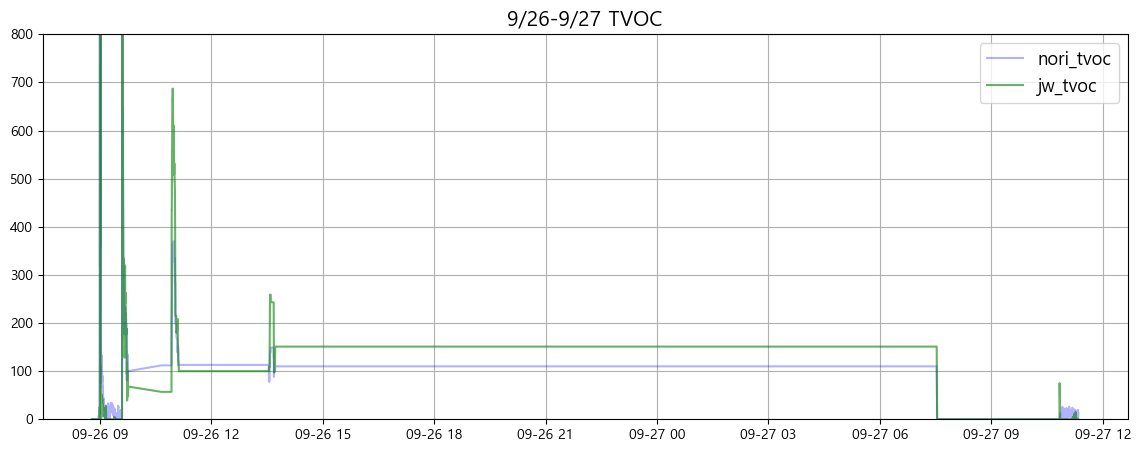

In [35]:
plt.figure(figsize=(14, 5))
plt.title('9/26-9/27 TVOC', fontsize=15)
plt.plot(data['시간'], data['Nori_TVOC'], color='blue', alpha=0.3, label='nori_tvoc')
plt.plot(data['시간'], data['TVOC_6'], color='green', alpha=0.6, label='jw_tvoc')
plt.ylim(0, 800)
plt.legend(fontsize=13)
plt.grid()
plt.show()

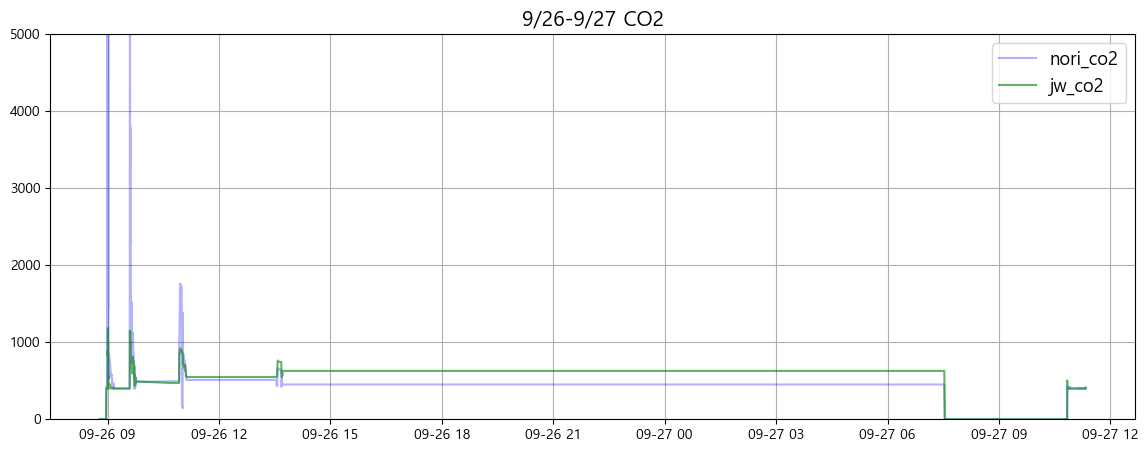

In [41]:
plt.figure(figsize=(14, 5))
plt.title('9/26-9/27 CO2', fontsize=15)
plt.plot(data['시간'], data['Nori_CO2'], color='blue', alpha=0.3, label='nori_co2')
plt.plot(data['시간'], data['CO2_6'], color='green', alpha=0.6, label='jw_co2')
plt.ylim(0, 5000)
plt.legend(fontsize=13)
plt.grid()
plt.show()

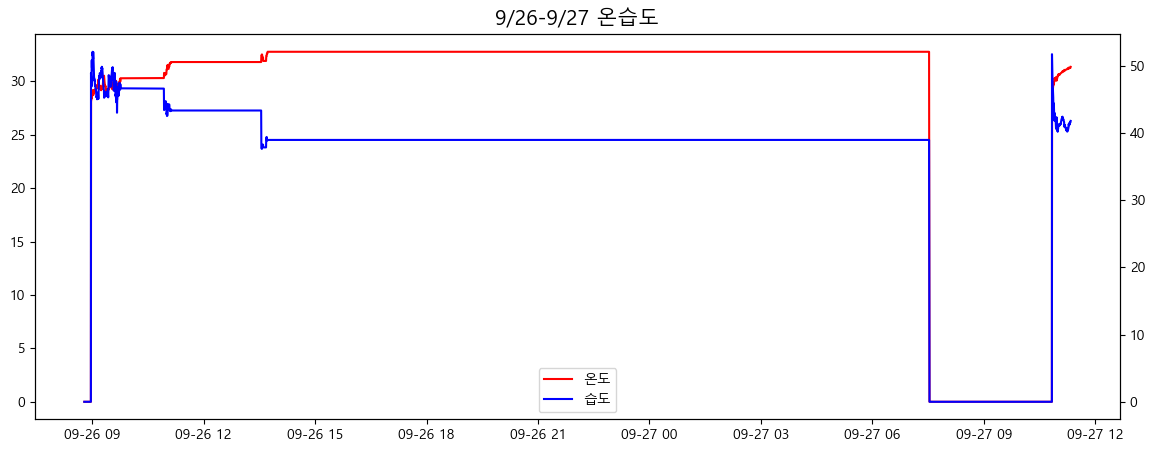

In [43]:
plt.figure(figsize=(14, 5))
plt.title('9/26-9/27 온습도', fontsize=15)
ax1 = plt.subplot(111)
ax2 = ax1.twinx()
a, = ax1.plot(data['시간'], data['Temp_6'], '-', color='red', label='온도')
b, = ax2.plot(data['시간'], data['Humidty_6'], '-', color='blue', label='습도')
p = [a, b]
ax1.legend(p, [p_.get_label() for p_ in p])
# plt.grid()
plt.show()

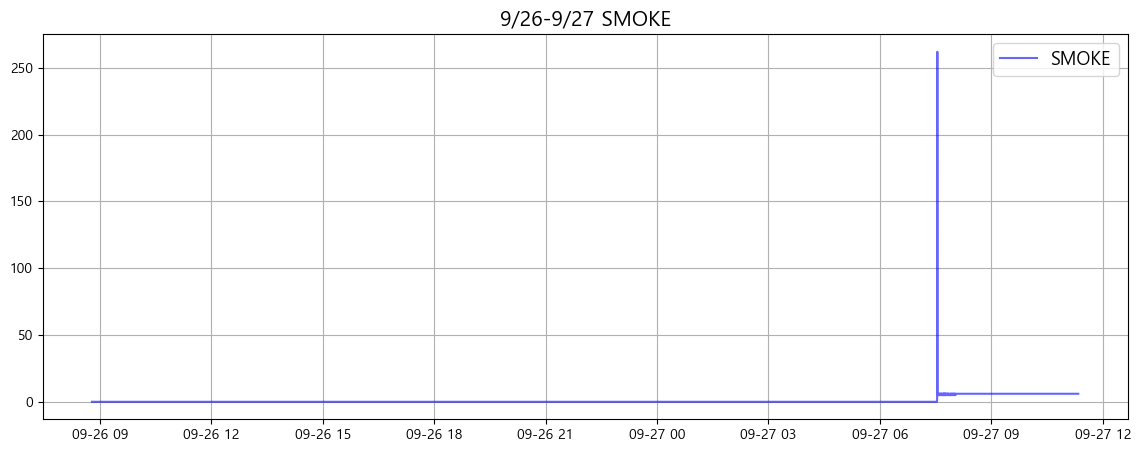

In [45]:
plt.figure(figsize=(14, 5))
plt.title('9/26-9/27 SMOKE', fontsize=15)
plt.plot(data['시간'], data['Smoke'], color='blue', alpha=0.6, label='SMOKE')
plt.legend(fontsize=13)
plt.grid()
plt.show()

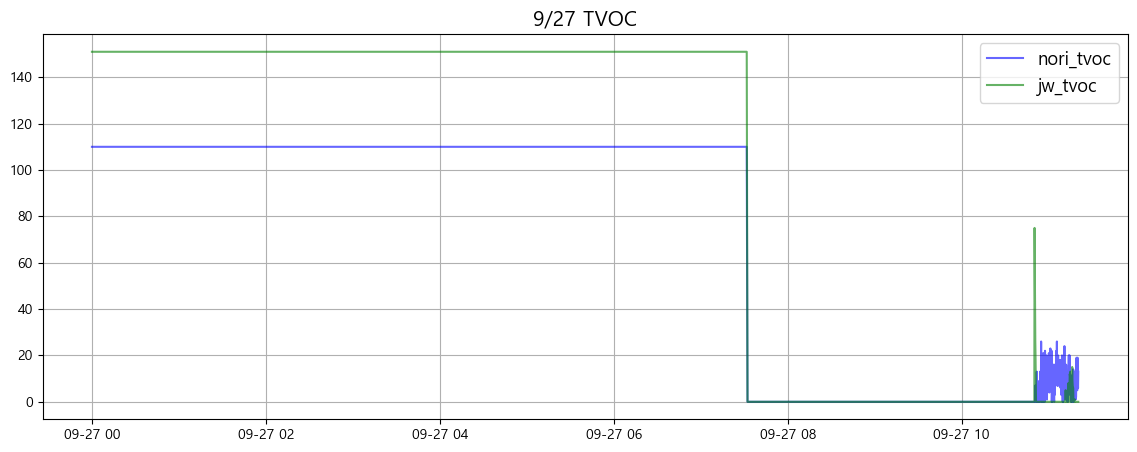

In [38]:
plt.figure(figsize=(14, 5))
plt.title('9/27 TVOC', fontsize=15)
plt.plot(d27['시간'], d27['Nori_TVOC'], color='blue', alpha=0.6, label='nori_tvoc')
plt.plot(d27['시간'], d27['TVOC_6'], color='green', alpha=0.6, label='jw_tvoc')
# plt.ylim(0, 800)
plt.legend(fontsize=13)
plt.grid()
plt.show()

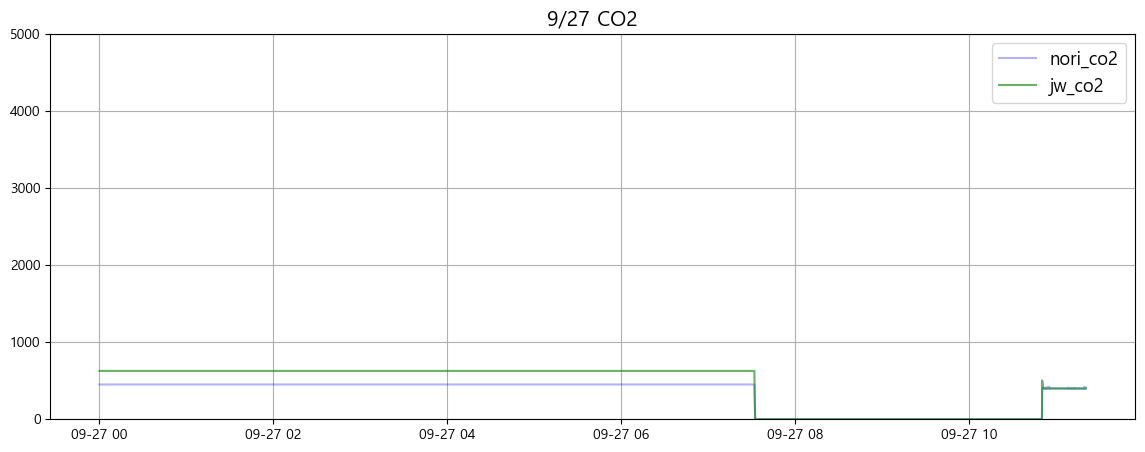

In [47]:
plt.figure(figsize=(14, 5))
plt.title('9/27 CO2', fontsize=15)
plt.plot(d27['시간'], d27['Nori_CO2'], color='blue', alpha=0.3, label='nori_co2')
plt.plot(d27['시간'], d27['CO2_6'], color='green', alpha=0.6, label='jw_co2')
plt.ylim(0, 5000)
plt.legend(fontsize=13)
plt.grid()
plt.show()

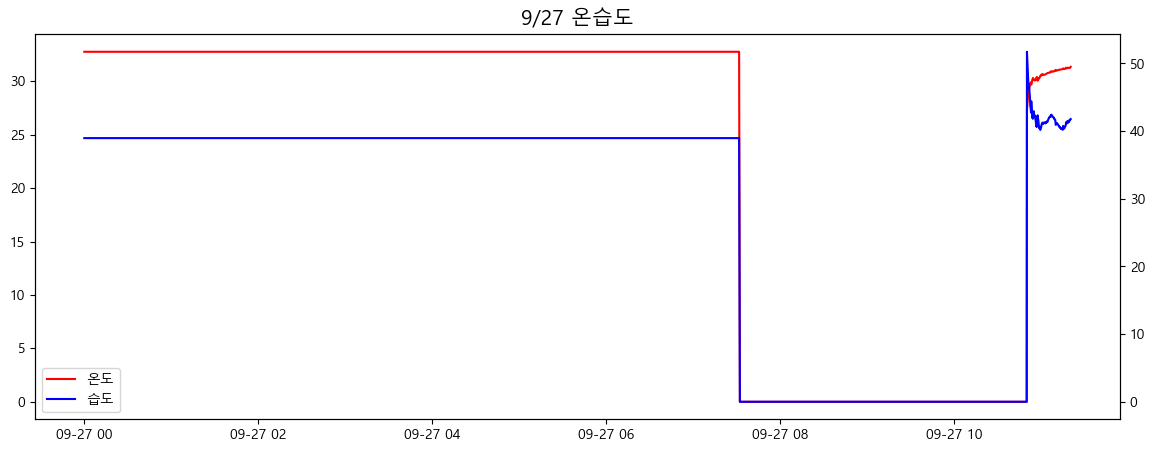

In [44]:
plt.figure(figsize=(14, 5))
plt.title('9/27 온습도', fontsize=15)
ax1 = plt.subplot(111)
ax2 = ax1.twinx()
a, = ax1.plot(d27['시간'], d27['Temp_6'], '-', color='red', label='온도')
b, = ax2.plot(d27['시간'], d27['Humidty_6'], '-', color='blue', label='습도')
p = [a, b]
ax1.legend(p, [p_.get_label() for p_ in p])
# plt.grid()
plt.show()

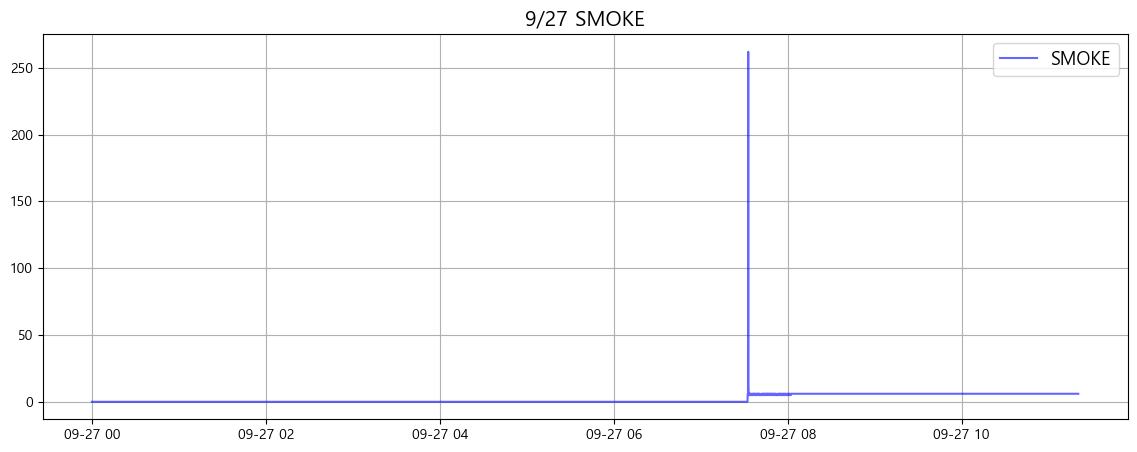

In [46]:
plt.figure(figsize=(14, 5))
plt.title('9/27 SMOKE', fontsize=15)
plt.plot(d27['시간'], d27['Smoke'], color='blue', alpha=0.6, label='SMOKE')
plt.legend(fontsize=13)
plt.grid()
plt.show()